<a href="https://colab.research.google.com/github/JeremySpradlin/DS-Unit-1-Build/blob/master/Jeremy_Spradlin_Mars_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detecting Seasonal Patterns on Mars

This notebook will be looking at weather data collected from the REMS package located on the Mars Rover Curisoity over a 6 year period starting in August of 2012 to 2018.

Below we will import the data and look at what is contained in it

In [1]:
import pandas as pd

url = 'https://query.data.world/s/u7jddcn4jdjidyncwf5nztoougzshw'

df = pd.read_csv(url)


df.head()

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny


##Initial Data Analysis

Looking at the table above, we can see we have several columns of data that we can analyze to determine if there are any seasonal patterns on Mars.  We have
- Terrestrial Date / Sol
- Ls (Solar Longitude)
- Month
- Minimum Temperature for the day
- Maximum Temperature for the day
- Average Pressure for the day
- Average Wind Speed for the day
- Atmospheric Opacity



In [71]:
print(df['atmo_opacity'].unique())

['Sunny' '--']


In [72]:
print(df['wind_speed'].unique())

[nan]


In [73]:
print(df['month'].unique())

['Month 5' 'Month 4' 'Month 3' 'Month 2' 'Month 1' 'Month 12' 'Month 11'
 'Month 10' 'Month 9' 'Month 8' 'Month 7' 'Month 6']


## Evaluating which variables to keep and use

Looking at the above data, we can see the colums for `atmo_opacity` and `wind_speed` do not really contain any information, with `wind_speed` containing all NaNs.  
- According to the data information located at: https://data.world/the-pudding/mars-weather, it states that `wind_speed` has not been recorded since Sol 1485, however our table does not appear to contain any wind speed data.

Since these columns do not contain anything that we can use, we will remove them from our data to keep things clean.  

In [2]:
mars = df.drop(['id', 'terrestrial_date', 'wind_speed', 'atmo_opacity'], axis=1)

mars.head()

,sol,ls,month,min_temp,max_temp,pressure
0,1977,135,Month 5,-77.0,-10.0,727.0
1,1976,135,Month 5,-77.0,-10.0,728.0
2,1975,134,Month 5,-76.0,-16.0,729.0
3,1974,134,Month 5,-77.0,-13.0,729.0
4,1973,133,Month 5,-78.0,-18.0,730.0


In [43]:
mars['sol'].unique()

array([1977, 1976, 1975, ...,   10,    9,    1])

In [3]:
mars.dtypes

sol           int64
ls            int64
month        object
min_temp    float64
max_temp    float64
pressure    float64
dtype: object

## Converting categorical variables to numeric for grpahing

As we can see from the above cell, most of our data in our current table is numeric, however we still have one column using an `object` data type, month.  

Since months for Mars are measured by Mar's solar longitude, Ls, and divided into 12 months via each 30 degrees, we can swap out these strings for numeric values matching their month, e.g. `Month 5` will just be `5`.

In [4]:
#Convert the Mars month column to numeric values
import numpy as np
#df = df.replace({'more': '5'})
test = mars
test.head()

,sol,ls,month,min_temp,max_temp,pressure
0,1977,135,Month 5,-77.0,-10.0,727.0
1,1976,135,Month 5,-77.0,-10.0,728.0
2,1975,134,Month 5,-76.0,-16.0,729.0
3,1974,134,Month 5,-77.0,-13.0,729.0
4,1973,133,Month 5,-78.0,-18.0,730.0


In [5]:
test.dtypes

sol           int64
ls            int64
month        object
min_temp    float64
max_temp    float64
pressure    float64
dtype: object

In [6]:
 #Create the modification function
def change_month(orig_value):
  return int(orig_value.strip().strip('Month '))

#Create an empty list to store modified values in
mod_values = []

#For Loop for iterating through the column and creating the list of new values
for i in test['month']:
  mod_values.append(change_month(i))

#Add the list to the dataset as a new column
test['month'] = pd.Series(mod_values)
#print(mod_values)

In [7]:
test['month'].unique()

array([ 5,  4,  3,  2,  1, 12, 11, 10,  9,  8,  7,  6])

In [8]:
test.head()

,sol,ls,month,min_temp,max_temp,pressure
0,1977,135,5,-77.0,-10.0,727.0
1,1976,135,5,-77.0,-10.0,728.0
2,1975,134,5,-76.0,-16.0,729.0
3,1974,134,5,-77.0,-13.0,729.0
4,1973,133,5,-78.0,-18.0,730.0


In [9]:
test.dtypes

sol           int64
ls            int64
month         int64
min_temp    float64
max_temp    float64
pressure    float64
dtype: object

##Our first visuals

Now that we have a table of numeric variables representing the weather conditions around the rover, we can start looking at some visuations to see what sort of patterns we see, or do not see.  

In [30]:
mars_by_month = mars.groupby('month').mean()

mars_by_month = mars_by_month.drop(['sol'], axis=1)

mars_by_month.dtypes


ls          float64
min_temp    float64
max_temp    float64
pressure    float64
dtype: object

In [19]:
#Import Altair library
import altair as alt
alt.renderers.enable('colab')

RendererRegistry.enable('colab')

In [32]:
mars_by_month = mars_by_month.reset_index()
mars_by_month.head()

,month,ls,min_temp,max_temp,pressure
0,1,15.164773,-77.160920,-15.448276,862.488506
1,2,44.373626,-79.932584,-23.426966,889.455056
2,3,74.871134,-83.307292,-27.677083,877.322917
3,4,104.365979,-82.747423,-25.252577,806.329897
4,5,132.885906,-79.308725,-16.711409,748.557047


###Now that we've adjusted the data some, we need to understand how time is considered on Mars

In order to help deal with the discrpancies between how we keep track of our location in our orbit around the sun, and Mars being an entirely different, and larger orbit, we will mostly keep track of our time via `sols`, which is the length of time it takes for Mars to complete one full rotation (about 3% long than an Earth day), and it's Ls measurement.  

Ls, or Solar Longitude, is the measurement to the sun in relation to Mar's location in it's orbit, starting at Ls = 0, and completing at Ls = 360.  

Months on Mars are then broken down into 12 months, divided out each so that each month equals about 30 degrees worth of it's Ls span.  Due to Mar's more eliptical orbit, some months are much longer than others.  

In [60]:
alt.Chart(mars_by_month, title='Average Max Temps by Month').mark_bar(size=31, color='red').encode(
    x='month',
    y='max_temp',
    color=alt.Color('ls', scale=alt.Scale(scheme='plasma')),
    tooltip=list(mars_by_month.columns),
)

alt.Chart(...)

In [24]:
alt.Chart(mars, title='Max Temp colored by ls').mark_bar(color='red').encode(
    x='month',
    y='average(max_temp)',
    color=alt.Color('ls', scale=alt.Scale(scheme='plasma')),
    tooltip=list(mars.columns),
)

alt.Chart(...)

In [5]:
import altair as alt
alt.renderers.enable('colab')

alt.Chart(mars, title='Max Temp colored by ls').mark_point(color='red').encode(
    x='sol',
    y='max_temp',
    color=alt.Color('ls', scale=alt.Scale(scheme='plasma')),
    tooltip=list(mars.columns),
)


alt.Chart(...)

In [6]:
alt.Chart(mars, title='Min temp colored by ls').mark_point(color='red').encode(
    x='sol',
    y='min_temp',
    color=alt.Color('ls', scale=alt.Scale(scheme='plasma')),
    tooltip=list(mars.columns),
)

alt.Chart(...)

In [7]:
mars['temp_difference'] = mars['max_temp'] - mars['min_temp']
mars.head()

,sol,ls,min_temp,max_temp,pressure,temp_difference
0,1977,135,-77.0,-10.0,727.0,67.0
1,1976,135,-77.0,-10.0,728.0,67.0
2,1975,134,-76.0,-16.0,729.0,60.0
3,1974,134,-77.0,-13.0,729.0,64.0
4,1973,133,-78.0,-18.0,730.0,60.0


In [8]:
alt.Chart(mars, title='Temp differences colored by ls').mark_point(color='red').encode(
    x='sol',
    y='temp_difference',
    color=alt.Color('ls', scale=alt.Scale(scheme='plasma')),
    tooltip=list(mars.columns),
)

alt.Chart(...)

In [9]:
alt.Chart(mars, title='Pressure changes colored by ls').mark_point(color='red').encode(
    x='sol',
    y='pressure',
    color=alt.Color('ls', scale=alt.Scale(scheme='plasma')),
    tooltip=list(mars.columns),
)

alt.Chart(...)

In [ ]:
alt.Chart(mars, title='Pressure colored by max temp').mark_point(color='red').encode(
    x='sol',
    y='pressure',
    color=alt.Color('max_temp', scale=alt.Scale(scheme='plasma')),
    tooltip=list(mars.columns),
)

alt.Chart(...)

In [59]:
ls = alt.Chart(mars, title='LS measured by Sol').mark_point().encode(
    x='sol',
    y='ls',
    tooltip=list(mars.columns),
).configure_mark(
    opacity=0.1,
    color='red'
)
ls.save('ls.html')

# Playing around with the dataset for KMeans testing

Just for kicks

In [14]:
mars = mars.dropna()
mars.isnull().sum()

sol                0
ls                 0
min_temp           0
max_temp           0
pressure           0
temp_difference    0
dtype: int64

In [15]:
mars.dtypes

sol                  int64
ls                   int64
min_temp           float64
max_temp           float64
pressure           float64
temp_difference    float64
dtype: object

In [19]:
#Convert sol and ls columns to float for kmeans testing
mars = mars.astype(float)
mars.dtypes


sol                float64
ls                 float64
min_temp           float64
max_temp           float64
pressure           float64
temp_difference    float64
dtype: object

In [21]:
#Perform Standardization and PCA
scaler = StandardScaler()

#Use the scaler object to fit_transform our data
Z = scaler.fit_transform(mars)

#Create the PCA instance
pca = PCA(.9)

#Fit the PCA instance on our data
pca.fit(Z)

#Transform the data
B = pca.transform(Z)

print(B)

[[ 0.24563944  2.51069041 -1.09486196 -0.10875668]
 [ 0.2449166   2.4934418  -1.09648076 -0.11499987]
 [ 0.95359737  2.13450084 -1.18094528  0.73822134]
 ...
 [ 0.39012051  1.00699608  1.97413265  1.54573387]
 [-0.45170641  1.33860417  2.01939293  0.7525979 ]
 [ 0.1374406   1.05834432  1.94723619  1.50460836]]


In [22]:
#Turn B into a dataframe to work with
df = pd.DataFrame(B)
df.head()

,0,1,2,3
0,0.245639,2.510690,-1.094862,-0.108757
1,0.244917,2.493442,-1.096481,-0.115000
2,0.953597,2.134501,-1.180945,0.738221
3,0.608948,2.340947,-1.111858,0.218027
4,1.230356,2.170597,-1.090264,0.601678


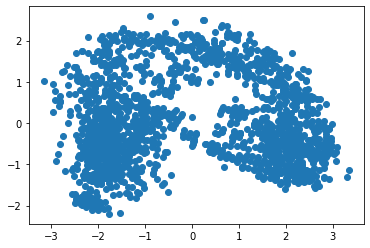

In [24]:
import matplotlib.pyplot as plt

plt.scatter(df[0], df[1])

plt.show()

In [25]:
#Perform K Means clustering
kmeans = KMeans(4)
kmeans.fit(df)

print(kmeans.labels_)

[2 2 3 ... 2 2 2]


In [27]:
#Add the clusters column to the dataframe

df['clusters'] = kmeans.labels_
df.head()

,0,1,2,3,clusters
0,0.245639,2.510690,-1.094862,-0.108757,2
1,0.244917,2.493442,-1.096481,-0.115000,2
2,0.953597,2.134501,-1.180945,0.738221,3
3,0.608948,2.340947,-1.111858,0.218027,2
4,1.230356,2.170597,-1.090264,0.601678,3


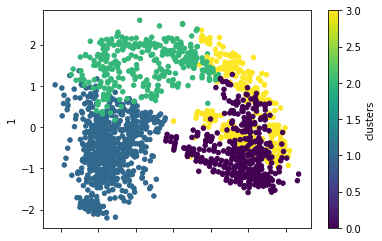

In [28]:
df.plot.scatter(0, 1, c='clusters', cmap='viridis')

plt.show()

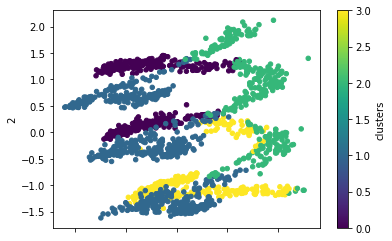

In [32]:
df.plot.scatter(1, 2, c='clusters', cmap='viridis')

plt.show()

In [34]:
df.head()

,0,1,2,3,clusters
0,0.245639,2.510690,-1.094862,-0.108757,2
1,0.244917,2.493442,-1.096481,-0.115000,2
2,0.953597,2.134501,-1.180945,0.738221,3
3,0.608948,2.340947,-1.111858,0.218027,2
4,1.230356,2.170597,-1.090264,0.601678,3


In [39]:
df.columns = ['first', 'second', 'third', 'fourth', 'clusters']

In [40]:
df.head()

,first,second,third,fourth,clusters
0,0.245639,2.510690,-1.094862,-0.108757,2
1,0.244917,2.493442,-1.096481,-0.115000,2
2,0.953597,2.134501,-1.180945,0.738221,3
3,0.608948,2.340947,-1.111858,0.218027,2
4,1.230356,2.170597,-1.090264,0.601678,3


In [44]:
alt.Chart(df, title='KMeans Clustering').mark_point(color='red').encode(
    x='first',
    y='second',
    color=alt.Color('clusters', scale=alt.Scale(scheme='plasma')),
    tooltip=list(df.columns),
)


alt.Chart(...)